In [14]:
########################################################################
## Activity 02 Real uses of spatial and morphological filters         ##
## Rev.01                                                             ##
##                                                                    ##
########################################################################
#install on Google Colab ocr package
!sudo apt install tesseract-ocr
!pip install pytesseract
#import section
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import math
import cv2
from math import * 
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 c

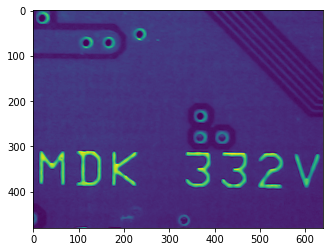

In [16]:
original_image = Image.open("pcbmodel3.jpg") # Name of the image
original_image_grayscale = ImageOps.grayscale(original_image)
plt.imshow(original_image_grayscale)
# Obtain the number of rows and columns
# of the image
width, height  = original_image_grayscale.size



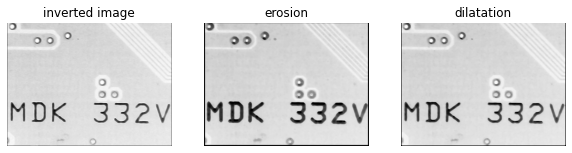

In [19]:
#invert image
inv_image = np.zeros((height,width, 3), np.uint8)
imagev= original_image_grayscale.load()
for i in range(1, width-1):
  for j in range(1,height-1 ):
     inv_image[j,i]= 255-imagev[i,j]
#Definition of the structural element
kernel =  cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
#img_dilated=cv2.dilate(inv_image,kernel,iterations=3)
img_erosion = cv2.erode(inv_image, kernel, iterations=3)
img_dilatation = cv2.dilate(img_erosion, kernel, iterations=2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 ,figsize=(10 , 10))
ax1.title.set_text("inverted image")
ax1.axis("off")
ax1.imshow(inv_image)
ax2.title.set_text("erosion")
ax2.axis("off")
ax2.imshow(img_erosion, cmap='gray')
ax3.title.set_text("dilatation")
ax3.axis("off")
ax3.imshow(img_dilatation, cmap='gray')

In [ ]:
#Morphological process
# Canny for border detection
thresholds = 100
thresholds2 = 255
canny = cv2.Canny(img_dilatation, thresholds,thresholds2)

print("canny algorithm") 
cv2_imshow(canny)



In [ ]:
# Find contours
text=[]
im2 = canny.copy()

contours,_ = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(im2, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 
for cnt in contours:
     cv2.drawContours(im2,cnt,0,(0,255,0),3)
     x, y, w, h = cv2.boundingRect(cnt) 
     rect = cv2.rectangle(im2,(x, y),(x + w, y + h),(0, 255, 0), 2)   
     cropped = im2[y:y + h, x:x + w]
     text = pytesseract.image_to_string(im2.copy(),config='--psm 12')
print(text)
if text.find('2C') != -1:
    print("MODEL SEAGATE FOUND")
    print("LOAD FIRMWARE:SGXXXX2C")
if text.find("2V") != -1:
    print("MODEL WESTERN DIGITAL FOUND")
    print("LOAD FIRMWARE:WDXXXX2B")    
else:
    print("MODEL NOT FOUND")
    print("CALL TEST TECHNICIAN")